# Comparing Ethereum Prices with Google Trends

## What is Ethereum?

You've probably heard of bitcoin - a cryptocurrency that is the first decentralized digital currency. It uses a peer-to-peer network, and transactions use cryptography, and are recorded on a blockchain, which is a public distributed ledger. 

Ethereum is a public, blockchain-based distributed computing platform that runs smart contracts: applications that run exactly as programmed.

Examples of smart contracts:

* Function as 'multi-signature' accounts, so that funds are spent only when a required percentage of people agree
* Manage agreements between users, say, if one buys insurance from the other
* Provide utility to other contracts (similar to how a software library works)
* Store information about an application, such as domain registration information or membership records.

Ethereum uses Ether  (ETH), a digital currency/token used to pay for the transactions.

## Project Goal
To compare ethereum prices to Google trend keywords for Ether, etc. 

I found the history of Ethererum prices on Kaggle as a csv file: https://www.kaggle.com/kingburrito666/ethereum-historical-data/data

To pull Google trends, I used pytrends, which is an unofficial API for Google Trends. I installed pytrends:

`/Users/shennonlu/anaconda/envs/ananas/bin/pip install pytrends`

https://github.com/GeneralMills/pytrends

## Sources
* https://www.ethereum.org/
* https://www.coindesk.com/information/ethereum-smart-contracts-work/ 


In [53]:
#import necessary packages
import numpy as np
import pandas as pd
import pytrends
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [54]:
#import a .csv file to a DataFrame
df_price = pd.read_csv('EtherMarketCapChart.csv', index_col='date', parse_dates=True)

In [55]:
df_price.describe()

,UnixTimeStamp,Supply,MarketCap,Price
count,8.660000e+02,8.660000e+02,866.000000,866.000000
mean,1.475584e+09,8.456716e+07,7648.436861,81.802564
std,2.161391e+07,7.428615e+06,12407.099058,130.579625
min,1.438214e+09,7.204931e+07,0.000000,0.000000
25%,1.456898e+09,7.779412e+07,582.925736,7.152500
50%,1.475582e+09,8.465381e+07,967.770995,11.555000
75%,1.494266e+09,9.145810e+07,8053.942251,87.927500
max,1.513210e+09,9.628188e+07,67295.168640,699.090000


In [56]:
df_price['Price'].head()

date
2015-07-30    0.0
2015-07-31    0.0
2015-08-01    0.0
2015-08-02    0.0
2015-08-03    0.0
Name: Price, dtype: float64

In [57]:
df_price['Price'].tail()

date
2017-12-07    421.15
2017-12-11    513.29
2017-12-12    656.52
2017-12-13    699.09
2017-12-14    693.58
Name: Price, dtype: float64

In [58]:
#Connect to Google using pytrends
pytrends = TrendReq(hl='en-US', tz=360)

#Build keyword list
kw_list = ['Ethereum', 'Ether', 'ETH', 'Ripple', 'XRP']

#Build payload, specify timeframe to be the same as df_price
pytrends.build_payload(kw_list, cat=0, timeframe='2015-07-30 2017-12-14', geo='', gprop='')

#Use "Interest Over Time" API parameter from pytrends
df_trends = pytrends.interest_over_time()

In [59]:
df_trends.describe()

,Ethereum,Ether,ETH,Ripple,XRP
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,8.274194,4.290323,4.580645,6.040323,1.112903
std,12.641613,1.354152,2.814298,9.470020,3.452841
min,0.000000,2.000000,2.000000,3.000000,0.000000
25%,1.000000,3.000000,3.000000,3.000000,0.000000
50%,2.000000,4.000000,3.000000,3.000000,0.000000
75%,10.500000,5.000000,5.000000,7.000000,2.000000
max,69.000000,11.000000,18.000000,100.000000,35.000000


In [60]:
df_trends['Ethereum'].head()

date
2015-08-02    1
2015-08-09    1
2015-08-16    0
2015-08-23    0
2015-08-30    0
Name: Ethereum, dtype: int64

In [61]:
df_trends['Ethereum'].tail()

date
2017-11-12    20
2017-11-19    30
2017-11-26    47
2017-12-03    54
2017-12-10    69
Name: Ethereum, dtype: int64

In [62]:
#Plot the Price of Ether, and the Google Trend for Ether
df_price['Price'].plot(kind='line', legend ='Price')
df_trends['Ethereum'].plot(kind='line', legend = 'Ethereum')
df_trends['ETH'].plot(kind='line', legend = 'Ether')

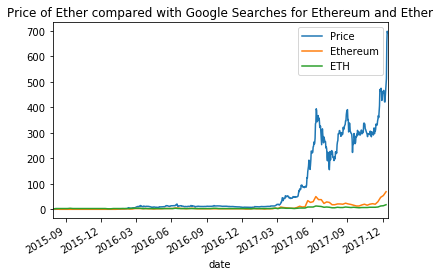

In [63]:
plt.title("Price of Ether compared with Google Searches for Ethereum and Ether")
plt.show()

In [64]:
#Find Correlation between Price and Google Trend
df_trends['Ethereum'].corr(df_price['Price'])

0.90461500980214493

In [65]:
#Find Rolling Correlation
df_trends['Ethereum'].rolling('10d').corr(df_price['Price'])

date
2015-07-30         NaN
2015-07-31         NaN
2015-08-01         NaN
2015-08-02         NaN
2015-08-03         NaN
2015-08-04         NaN
2015-08-05         NaN
2015-08-06         NaN
2015-08-07         NaN
2015-08-08         NaN
2015-08-09         NaN
2015-08-10         NaN
2015-08-11         NaN
2015-08-12         NaN
2015-08-13         NaN
2015-08-14         NaN
2015-08-15         NaN
2015-08-16   -0.595327
2015-08-17   -0.595327
2015-08-18   -0.595327
2015-08-19   -0.595327
2015-08-20   -0.595327
2015-08-21   -0.595327
2015-08-22   -0.595327
2015-08-23   -0.667129
2015-08-24   -0.667129
2015-08-25   -0.667129
2015-08-26   -0.667129
2015-08-27   -0.667129
2015-08-28   -0.667129
                ...   
2017-11-13    0.882171
2017-11-14    0.882171
2017-11-15    0.882171
2017-11-16    0.882171
2017-11-17    0.882171
2017-11-18    0.882171
2017-11-19    0.887554
2017-11-20    0.887554
2017-11-21    0.887554
2017-11-22    0.887554
2017-11-23    0.887554
2017-11-24    0.887554
2017-1

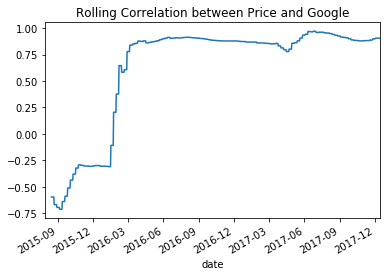

In [66]:
#Plot Rolling Correlation 
df_trends['Ethereum'].rolling('1D').corr(df_price['Price']).plot(kind = 'line')
plt.title("Rolling Correlation between Price and Google")
plt.show()

In [67]:
#Build another keyword with Bitcoin
kw_list_2 = ['Bitcoin']
pytrends.build_payload(kw_list_2, cat=0, timeframe='2015-07-30 2017-12-14', geo='', gprop='')
df_trends_2 = pytrends.interest_over_time()

In [68]:
df_trends_2.head()

,Bitcoin,isPartial
date,,
2015-08-02,2,False
2015-08-09,2,False
2015-08-16,3,False
2015-08-23,3,False
2015-08-30,2,False


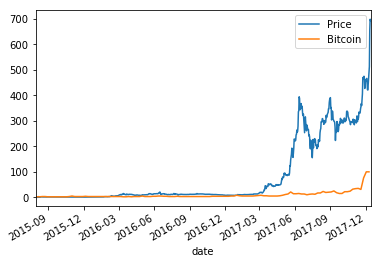

In [69]:
#Plot Price of Ether with Bitcoin Google Trend Search
df_price['Price'].plot(kind='line', legend = 'PriceEther')
df_trends_2['Bitcoin'].plot(kind='line', legend = 'Bitcoin Google Search')
plt.show()

In [70]:
df_trends_2['Bitcoin'].corr(df_price['Price'])

0.80148748525093816

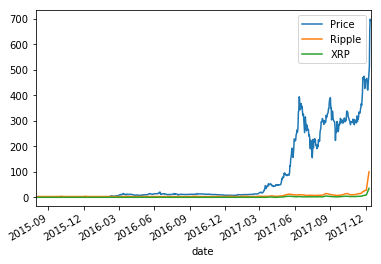

In [73]:
#Plot Price of Ether with Ripple Google Trend Search
kw_list_3 = ['Ripple', 'XRP']
pytrends.build_payload(kw_list_3, cat=0, timeframe='2015-07-30 2017-12-14', geo='', gprop='')
df_trends_3 = pytrends.interest_over_time()
df_price['Price'].plot(kind='line', legend = 'PriceEther')
df_trends_3['Ripple'].plot(kind='line', legend = 'Ripple')
df_trends_3['XRP'].plot(kind='line', legend = 'XRP')
plt.show()

In [74]:
df_trends_3['Ripple'].corr(df_price['Price'])

0.89423781537426805

In [75]:
df_trends_3['XRP'].corr(df_price['Price'])

0.89913500347322461